## Packages

In [19]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Optical Flow Algorithm

In [2]:
def optical_flow(I1g, I2g, window_size, tau=1e-2):
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])
    w = int(window_size/2)
    I1g = I1g / 255.
    I2g = I2g / 255.
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            b = np.reshape(It, (It.shape[0],1))
            A = np.vstack((Ix, Iy)).T
            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
                nu = np.matmul(np.linalg.pinv(A), b)
                u[i,j]=nu[0]
                v[i,j]=nu[1]
    return u, v

## Detection and Segmentation

In [40]:
im1 = cv2.imread('../data/eval-data-gray/Basketball/frame10.png')[:,:,0]
im2 = cv2.imread('../data/eval-data-gray/Basketball/frame11.png')[:,:,0]
u, v = optical_flow(im1, im2, 15)
img = u*u + v*v

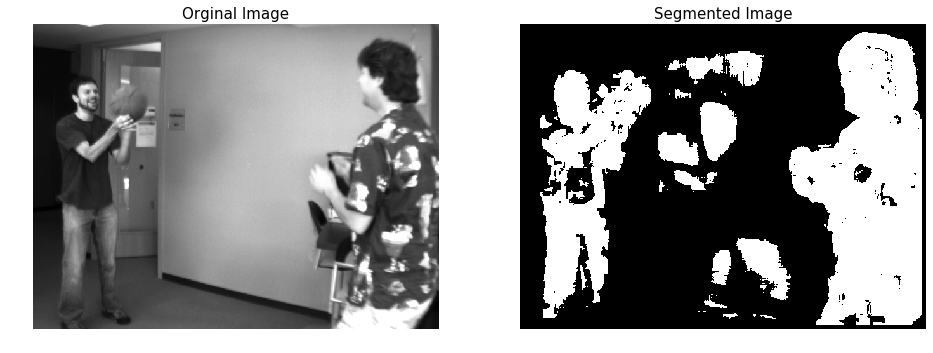

In [42]:
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(im1, cmap=cm.gray)
plt.axis('off')
plt.title('Orginal Image',fontsize=15)
plt.subplot(122)
plt.imshow(img > np.average(img)/10, cmap=cm.gray)
plt.axis('off')
plt.title('Segmented Image',fontsize=15)
plt.show()

## Tracking of objects in video sequence

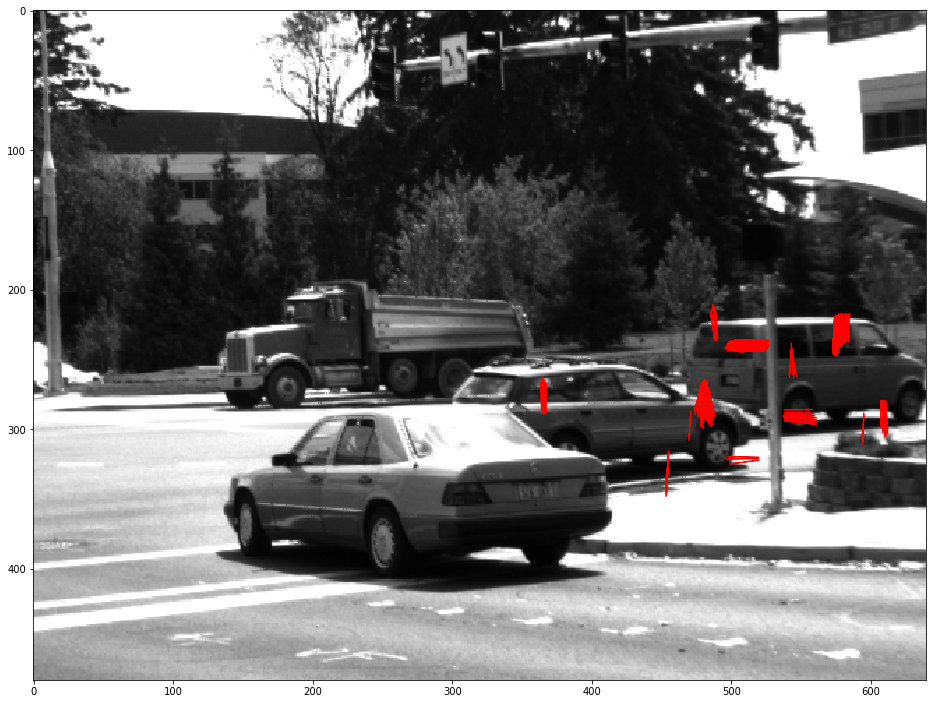

In [22]:
# hsv = np.zeros((u.shape[0],u.shape[1],3))
# mag, ang = cv2.cartToPolar(u, v)
# hsv[...,0] = ang*180/np.pi/2
# hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
# rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
# plt.figure(figsize=(16, 16))
# plt.imshow(rgb)
# plt.show()
t = 15
plt.figure(figsize=(16, 16))
plt.imshow(im1, cmap=plt.cm.gray)
for i in range(im1.shape[0]):
    print(i,end='\r')
    for j in range(im1.shape[1]):
        if abs(u[i,j])>t or abs(v[i,j])>t: # setting the threshold to plot the vectors
            plt.arrow(j,i,v[i,j],u[i,j],head_width = 1, head_length = 5, color = 'red')

plt.show()

## Analyzing how algorithm works when camera is moving